In [1]:
import os
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
print(f'PIL Version: {PIL.__version__}')
print(f'NumPy version: {np.__version__}')

PIL Version: 9.1.0
NumPy version: 1.21.6


In [3]:
# set seed
np.random.seed(42)

In [4]:
os.makedirs('assets', exist_ok=True)

In [5]:
# generate random images
rgb_image = np.random.randint(0, 255, (40, 80, 3), dtype=np.uint8)
grayscale_image = np.random.randint(0, 255, (40, 80), dtype=np.uint8)

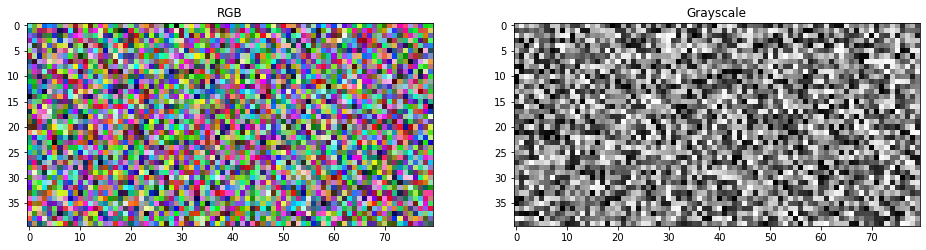

In [6]:
plt.figure(figsize=(16, 10))
plt.subplot(121)
plt.title('RGB')
plt.imshow(rgb_image)
plt.subplot(122)
plt.title('Grayscale')
plt.imshow(grayscale_image, cmap='gray')

In [7]:
# convert images to PIL format
rgb_image_pil = Image.fromarray(rgb_image)
grayscale_image_pil = Image.fromarray(grayscale_image)

In [8]:
# saving the image as png -> PNG is lossless
rgb_image_pil.save('assets/RGB_image.png', format='PNG')
grayscale_image_pil.save('assets/Grayscale_image.png', format='PNG')

In [9]:
# save the image as jpegs -> JPEG is lossless
# with default subsampling
rgb_image_pil.save('assets/RGB_image_with_default_subsampling.jpeg', format='JPEG', quality=100)
grayscale_image_pil.save('assets/Grayscale_image_with_default_subsampling.jpeg', format='JPEG', quality=100)

# save the image as jpegs -> JPEG is lossless
# with subsampling parameter set to 0
rgb_image_pil.save('assets/RGB_image_with_subsampling_0.jpeg', format='JPEG', quality=100, subsampling=0)
grayscale_image_pil.save('assets/Grayscale_image_with_subsampling_0.jpeg', format='JPEG', quality=100, subsampling=0)

In [10]:
# retrieve image and compare visually as well as numerically
png_rgb_image = np.asarray(Image.open('assets/RGB_image.png'))
png_grayscale_image = np.asarray(Image.open('assets/Grayscale_image.png'))

jpeg_rgb_image_default_subsampling = np.asarray(Image.open('assets/RGB_image_with_default_subsampling.jpeg'))
jpeg_grayscale_image_default_subsampling = np.asarray(Image.open('assets/Grayscale_image_with_default_subsampling.jpeg'))

jpeg_rgb_image_subsampling_0 = np.asarray(Image.open('assets/RGB_image_with_subsampling_0.jpeg'))
jpeg_grayscale_image_subsampling_0 = np.asarray(Image.open('assets/Grayscale_image_with_subsampling_0.jpeg'))

In [11]:
# saving time comparisons

In [12]:
# saving RGB image as PNG
%timeit rgb_image_pil.save('assets/RGB_image.png', format='PNG') 

1.3 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
# saving Grayscale image as PNG
%timeit grayscale_image_pil.save('assets/Grayscale_image.png', format='PNG')

1.26 ms ± 301 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
# saving RGB image as JPEG with default subsampling
%timeit rgb_image_pil.save('assets/RGB_image_with_default_subsampling.jpeg', format='JPEG', quality=100)

1.07 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
# saving Grayscale image as JPEG with default subsampling
%timeit grayscale_image_pil.save('assets/Grayscale_image_with_default_subsampling.jpeg', format='JPEG', quality=100)

1.18 ms ± 253 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
# saving RGB image as JPEG with subsampling=0
%timeit rgb_image_pil.save('assets/RGB_image_with_subsampling_0.jpeg', format='JPEG', quality=100, subsampling=0)

1.22 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
# saving Grayscale image as JPEG with subsampling=0
%timeit grayscale_image_pil.save('assets/Grayscale_image_with_subsampling_0.jpeg', format='JPEG', quality=100, subsampling=0)

1.18 ms ± 99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# PNG format comparison

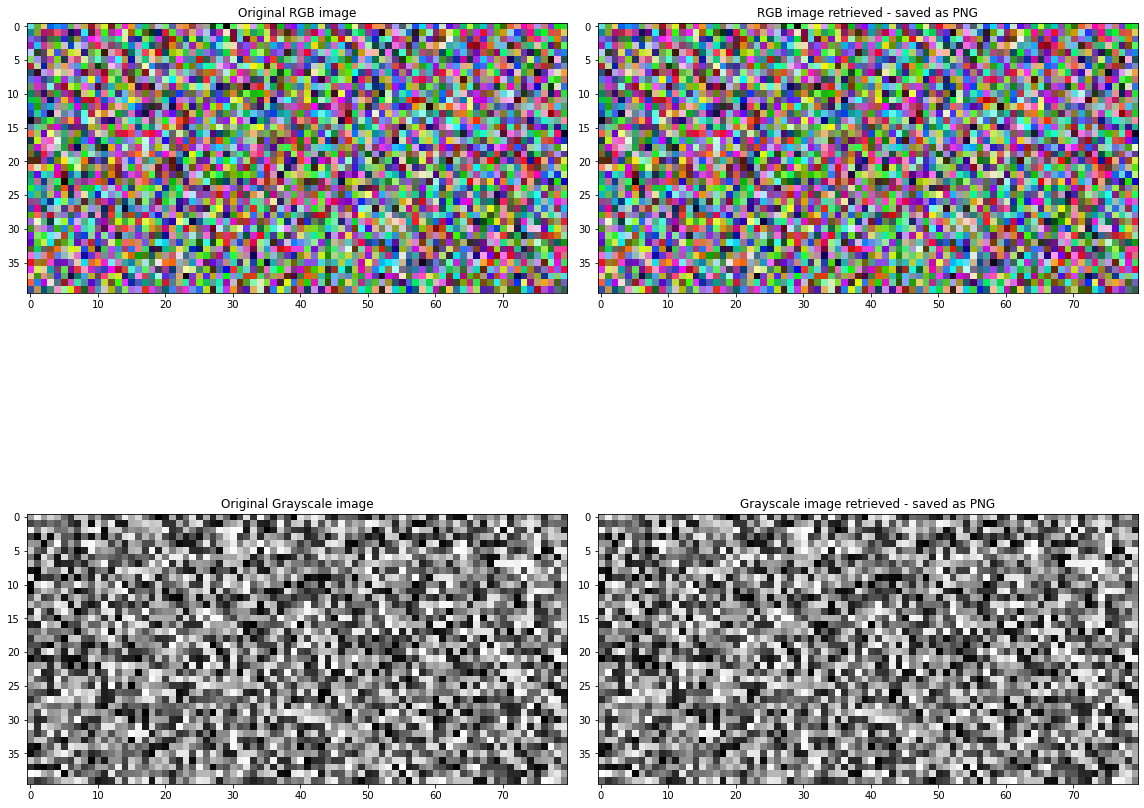

In [50]:
plt.figure(figsize=(16, 16), facecolor='white')
plt.subplot(221)
plt.title('Original RGB image')
plt.imshow(rgb_image)
plt.subplot(222)
plt.title('RGB image retrieved - saved as PNG')
plt.imshow(png_rgb_image)
plt.subplot(223)
plt.title('Original Grayscale image')
plt.imshow(grayscale_image, cmap='gray')
plt.subplot(224)
plt.title('Grayscale image retrieved - saved as PNG')
plt.imshow(png_grayscale_image, cmap='gray')
plt.tight_layout()

In [19]:
assert np.allclose(png_rgb_image.flatten(), rgb_image.flatten()), (png_rgb_image - rgb_image).mean()

In [20]:
assert np.allclose(png_grayscale_image.flatten(), grayscale_image.flatten()), (png_grayscale_image - grayscale_image).mean()

### Insights: 
PNG being a lossless format does not cause pixel intensities to change when saved and retrieved

We've verified this visually as well as mathematically by comparing the means of the images

# JPEG format comparison

## With default subsampling

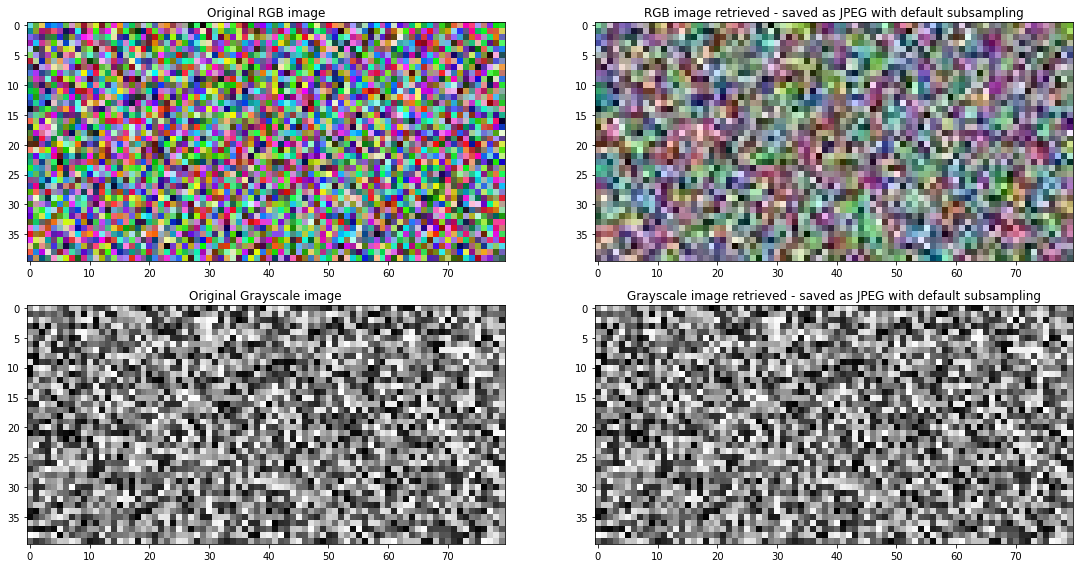

In [53]:
plt.figure(figsize=(16, 8), facecolor='white')
plt.subplot(221)
plt.title('Original RGB image')
plt.imshow(rgb_image)
plt.subplot(222)
plt.title('RGB image retrieved - saved as JPEG with default subsampling')
plt.imshow(jpeg_rgb_image_default_subsampling)
plt.subplot(223)
plt.title('Original Grayscale image')
plt.imshow(grayscale_image, cmap='gray')
plt.subplot(224)
plt.title('Grayscale image retrieved - saved as JPEG with default subsampling')
plt.imshow(jpeg_grayscale_image_default_subsampling, cmap='gray')
plt.tight_layout()
plt.savefig('assets/jpeg_image_compression_visual_analysis.png')

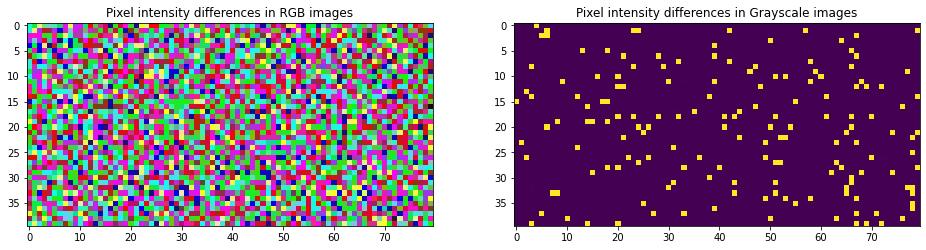

In [22]:
# differences
plt.figure(figsize=(16, 10))
plt.subplot(121)
plt.title('Pixel intensity differences in RGB images')
plt.imshow(np.abs(jpeg_rgb_image_default_subsampling - rgb_image))
plt.subplot(122)
plt.title('Pixel intensity differences in Grayscale images')
plt.imshow(np.abs(jpeg_grayscale_image_default_subsampling - grayscale_image))

* A difference of 128.39 is noted in the means of jpeg and original images

In [23]:
assert np.allclose(jpeg_rgb_image_default_subsampling.flatten(), rgb_image.flatten()), (jpeg_rgb_image_default_subsampling - rgb_image).mean()

AssertionError: 128.39104166666667

* A difference of 12.7 is noted in the means of jpeg and original images

In [24]:
assert np.allclose(jpeg_grayscale_image_default_subsampling.flatten(), grayscale_image.flatten()), (jpeg_grayscale_image_default_subsampling - grayscale_image).mean()

AssertionError: 12.7096875

### Insights:
The assertions were bound to fail since JPEG is a lossy compression technique.

The degradation can be verified visually too as seen in the plots above.

## With subsampling set to 0

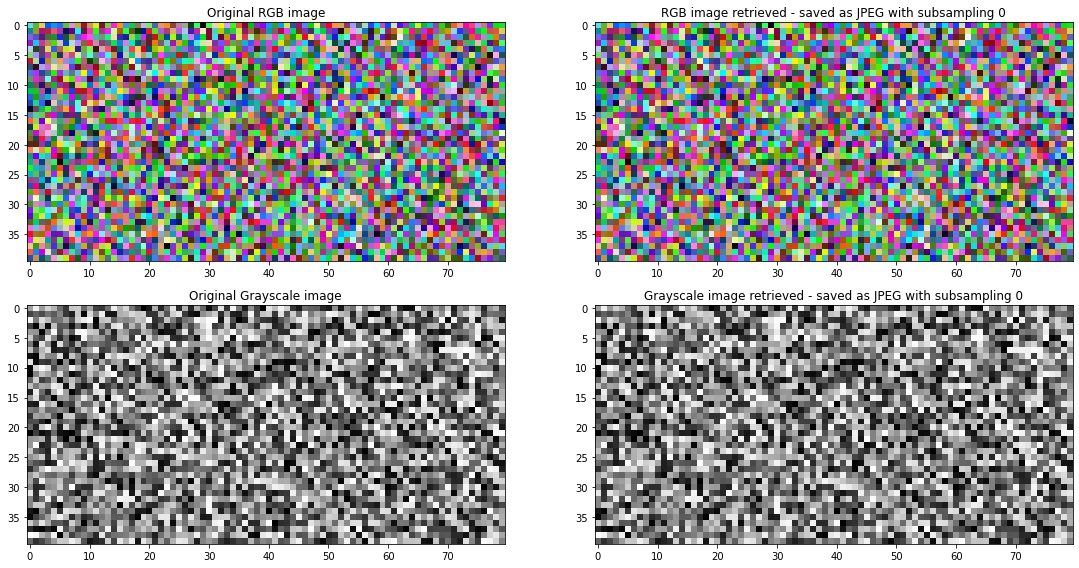

In [52]:
plt.figure(figsize=(16, 8), facecolor='white')
plt.subplot(221)
plt.title('Original RGB image')
plt.imshow(rgb_image)
plt.subplot(222)
plt.title('RGB image retrieved - saved as JPEG with subsampling 0')
plt.imshow(jpeg_rgb_image_subsampling_0)
plt.subplot(223)
plt.title('Original Grayscale image')
plt.imshow(grayscale_image, cmap='gray')
plt.subplot(224)
plt.title('Grayscale image retrieved - saved as JPEG with subsampling 0')
plt.imshow(jpeg_grayscale_image_subsampling_0, cmap='gray')
plt.tight_layout()
plt.savefig('assets/jpeg_image_compression_visual_analysis_with_subsampling_0.png')

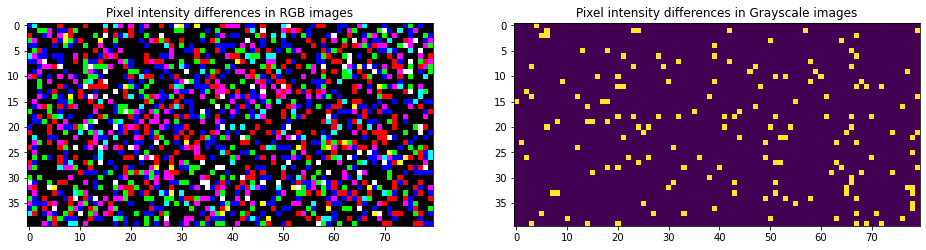

In [26]:
# differences
plt.figure(figsize=(16, 10))
plt.subplot(121)
plt.title('Pixel intensity differences in RGB images')
plt.imshow(np.abs(jpeg_rgb_image_subsampling_0 - rgb_image))
plt.subplot(122)
plt.title('Pixel intensity differences in Grayscale images')
plt.imshow(np.abs(jpeg_grayscale_image_subsampling_0 - grayscale_image))

* A difference of 54 is noted in the means of jpeg with subsampling=0 and original images

In [27]:
assert np.allclose(jpeg_rgb_image_subsampling_0.flatten(), rgb_image.flatten()), (jpeg_rgb_image_subsampling_0 - rgb_image).mean()

AssertionError: 54.0028125

* A difference of 12.7 is noted in the means of jpeg with subsampling=0 and original images

In [28]:
assert np.allclose(jpeg_grayscale_image_subsampling_0.flatten(), grayscale_image.flatten()), (jpeg_grayscale_image_subsampling_0 - grayscale_image).mean()

AssertionError: 12.7096875

### Insights:
The assertions were bound to fail since JPEG is a lossy compression technique.

But this time, the means were closer as ```subsampling=0``` shuts down some parts of the jpeg compression algorithm.

The degradation cannot br identified visually as easily as with default subsampling as seen in the plots above.

```subsamlping=0``` tries to preserve some information but only in the case of colour images.

The mean difference remains the same in case of grayscale images irrespective of setting the subsampling parameter to 0


# Verification on a big image

In [39]:
dog_img = Image.open('assets/dog_picture.jpg')

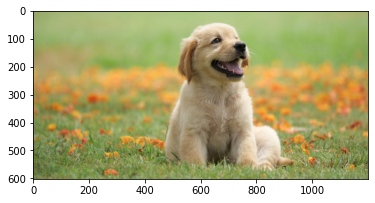

In [40]:
plt.imshow(dog_img)

In [41]:
dog_img.save('assets/dog_image_with_default_subsampling.jpeg', format='JPEG', quality=100)
dog_img.save('assets/dog_image_with_subsampling_0.jpeg', format='JPEG', quality=100, subsampling=0)
dog_img.save('assets/dog_image.png', format='PNG', quality=100)

In [42]:
dog_img_default_subsampling = Image.open('assets/dog_image_with_default_subsampling.jpeg')
dog_img_subsampling_0 = Image.open('assets/dog_image_with_subsampling_0.jpeg')

In [34]:
dog_img = np.asarray(dog_img)
dog_img_default_subsampling = np.asarray(dog_img_default_subsampling)
dog_img_subsampling_0 = np.asarray(dog_img_subsampling_0)

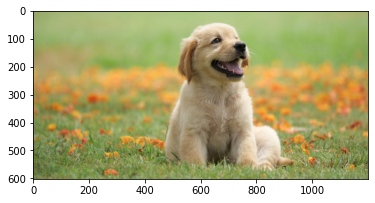

In [35]:
plt.imshow(dog_img)

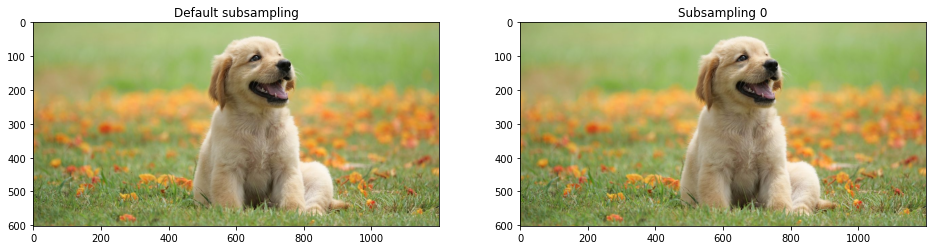

In [36]:
plt.figure(figsize=(16, 10))
plt.subplot(121)
plt.title('Default subsampling')
plt.imshow(dog_img_default_subsampling)
plt.subplot(122)
plt.title('Subsampling 0')
plt.imshow(dog_img_subsampling_0)

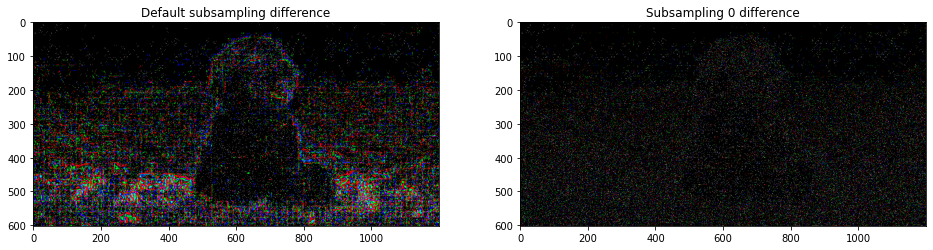

In [37]:
plt.figure(figsize=(16, 10))
plt.subplot(121)
plt.title('Default subsampling difference')
plt.imshow(np.abs(dog_img - dog_img_default_subsampling))
plt.subplot(122)
plt.title('Subsampling 0 difference')
plt.imshow(np.abs(dog_img - dog_img_subsampling_0))